<a href="https://colab.research.google.com/github/ugrasegehan/IE423/blob/main/Task10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IE423 Task10

# Egehan Uğraş

## 22003278

### Importing Required Libraries for Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
from datetime import datetime, timedelta

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols



In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the data

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/task10/dataset.csv')

# Replace 'NULL' with NaN
df.replace('NULL', np.nan, inplace=True)

# Convert columns to appropriate data types
df['datetime'] = pd.to_datetime(df['datetime'])


In [14]:
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


### Initial Data Check

In [15]:
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


### Checking the size of the data

In [16]:
df.shape

(48048, 17)

### Dealing Missing Values

In [17]:
df.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

We have already replaced missing values

In [18]:
# unique values
value_counts = df['Holiday_ID'].value_counts()

print(value_counts)

Holiday_ID
0     45024
12      168
3       144
11      144
21      144
19      144
16      144
4       144
2       144
1       144
10      144
9       144
8       144
7       144
6       144
5       144
14      120
15      120
17      120
18      120
20      120
22      120
13      120
Name: count, dtype: int64


### Setting Data Frequency to Hourly

In [19]:
# Convert the 'datetime' column to datetime objects if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Set the 'datetime' column as the index
df = df.set_index('datetime')

# Resample the data to ensure an hourly frequency
df = df.resample('H').sum()

# set the freq of index column
df.index.freq = 'H'

### Converting Numeric Values to Appropriate Formats

In [20]:
print(df.columns)

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')


In [21]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

print(numerical_columns)


Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')


In [22]:
# List of columns to convert to numeric
numerical_columns = ['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school']

# Convert each column to numeric
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [23]:
df.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


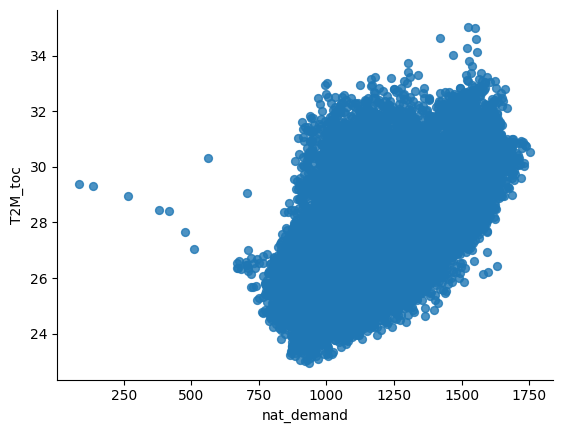

In [24]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='nat_demand', y='T2M_toc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Exploratory Data Analysis: Visual Overview of Denmark's Electricity Data

## Demand Patterns and Discrepancies

Text(0, 0.5, 'Demand')

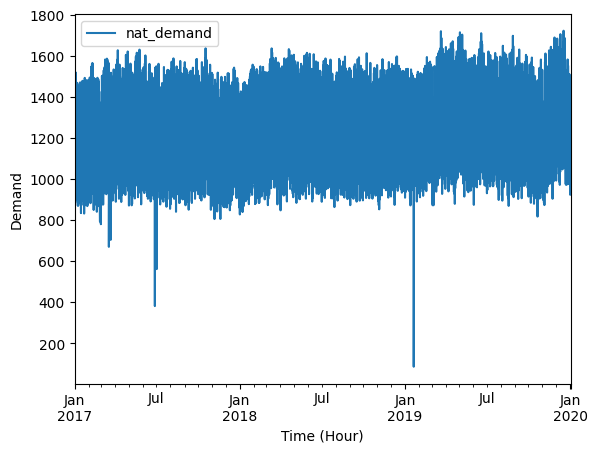

In [25]:
df[['nat_demand']]['2017-01-01': '2020-01-01'].plot()

plt.xlabel('Time (Hour)')
plt.ylabel('Demand')

Let's zoom into the data and mark every Friday by vertical dotted lines.

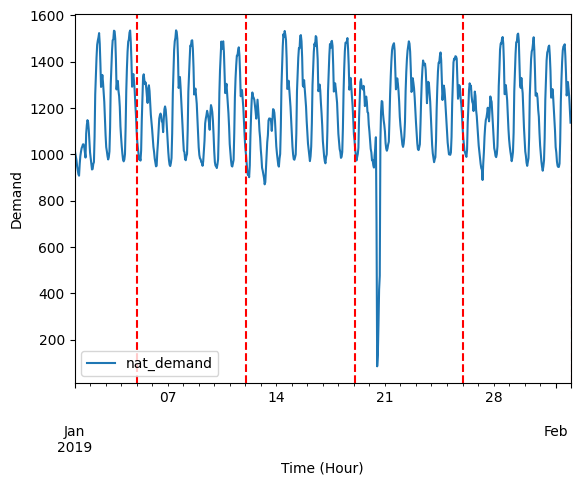

In [26]:
df[['nat_demand']]['2019-01-01': '2019-02-01'].plot()

plt.xlabel('Time (Hour)')
plt.ylabel('Demand')

# Adding vertical lines at the start of each week
min_date, max_date = df.index.min(), df.index.max()
current_date = min_date

while current_date <= max_date:
    if current_date.weekday() == 5:  # Monday is considered the start of the week
        plt.axvline(x=current_date, color='red', linestyle='--')
    current_date += pd.Timedelta(days=1)

### Computing Autocorrelation for the Demand Column

Text(0.5, 1.0, 'ACF Plot with Marked Peak at x=24 hours')

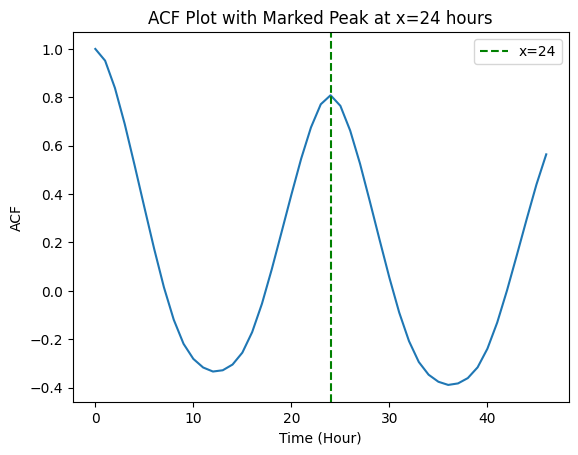

In [27]:
plt.plot(acf(df['nat_demand']))
plt.xlabel('Time (Hour)')
plt.ylabel('ACF')
plt.axvline(x=24, color='green', linestyle='--', label='x=24')

plt.legend()
plt.title('ACF Plot with Marked Peak at x=24 hours')

#### Data Consistency Check:
The data exhibit seasonal variations and a periodic pattern, without any evident upward or downward trend.


# Feature Plots


Text(0, 0.5, 'Temperature')

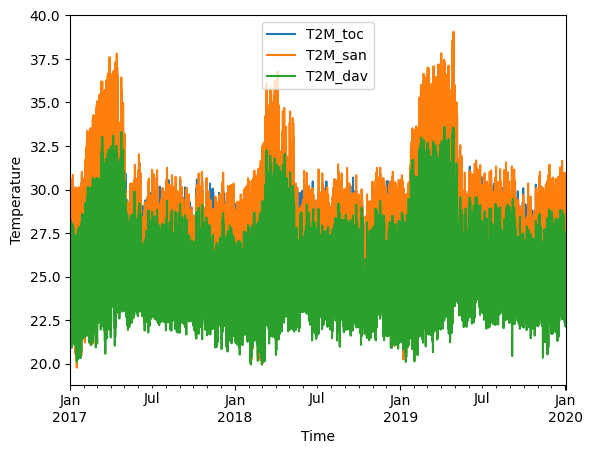

In [28]:
df[['T2M_toc', 'T2M_san', 'T2M_dav']]['2017-01-01': '2020-01-01'].plot()
plt.xlabel('Time')
plt.ylabel('Temperature')

Text(0, 0.5, 'Wind')

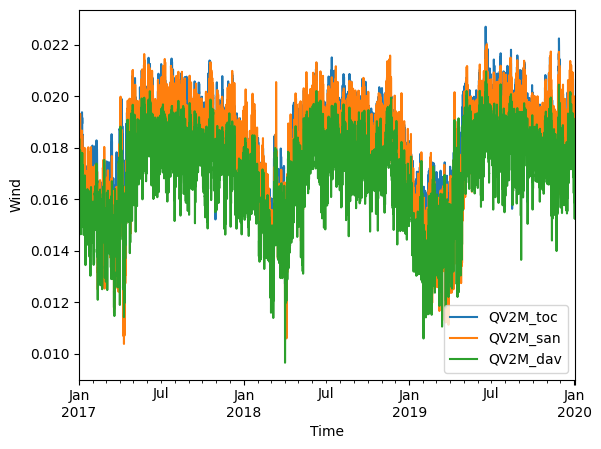

In [29]:
df[['QV2M_toc', 'QV2M_san', 'QV2M_dav']]['2017-01-01': '2020-01-01'].plot()
plt.xlabel('Time')
plt.ylabel('Wind')

Text(0, 0.5, 'Wind Energy (GWh)')

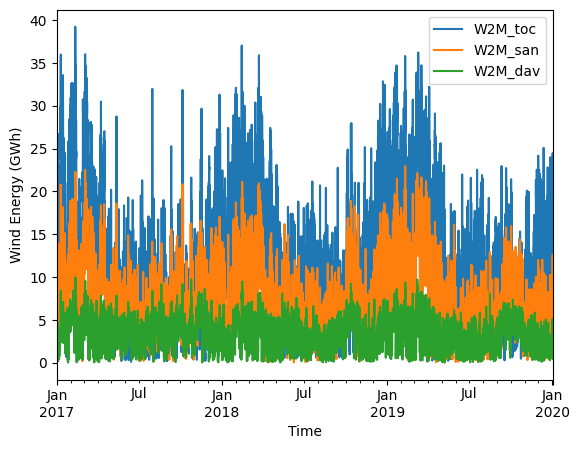

In [30]:
df[['W2M_toc', 'W2M_san', 'W2M_dav']]['2017-01-01': '2020-01-01'].plot()
plt.xlabel('Time')
plt.ylabel('Wind Energy (GWh)')

Text(0, 0.5, 'Wind')

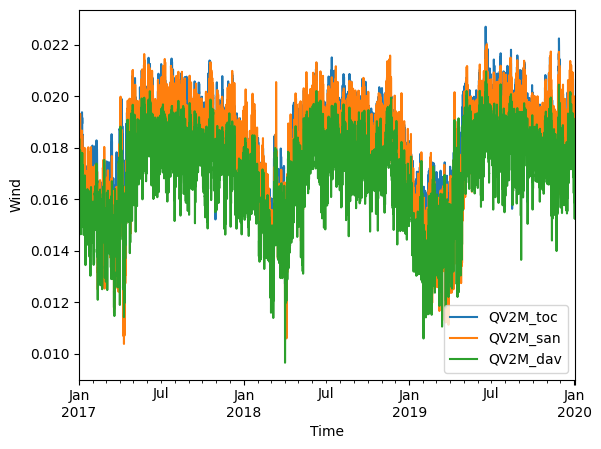

In [31]:
df[['QV2M_toc', 'QV2M_san', 'QV2M_dav']]['2017-01-01': '2020-01-01'].plot()
plt.xlabel('Time')
plt.ylabel('Wind')

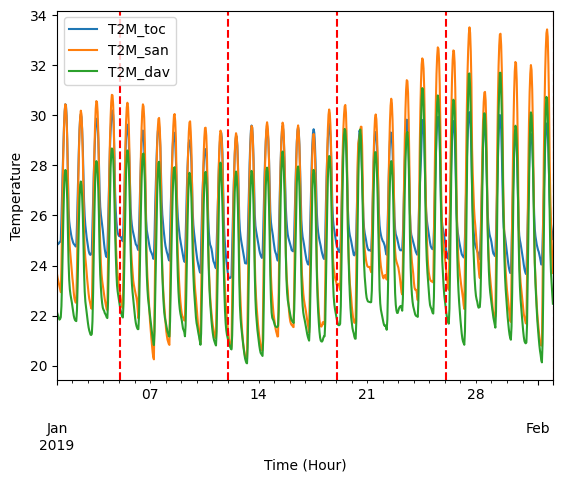

In [32]:
df[['T2M_toc', 'T2M_san', 'T2M_dav']]['2019-01-01': '2019-02-01'].plot()
plt.xlabel('Time (Hour)')
plt.ylabel('Temperature' )
# Adding vertical lines at the start of each week
min_date, max_date = df.index.min(), df.index.max()
current_date = min_date

while current_date <= max_date:
    if current_date.weekday() == 5:  # Monday is considered the start of the week
        plt.axvline(x=current_date, color='red', linestyle='--')
    current_date += pd.Timedelta(days=1)

### Computing Autocorrelation

Text(0.5, 1.0, 'ACF Plot with Marked Peak at x=24 hours')

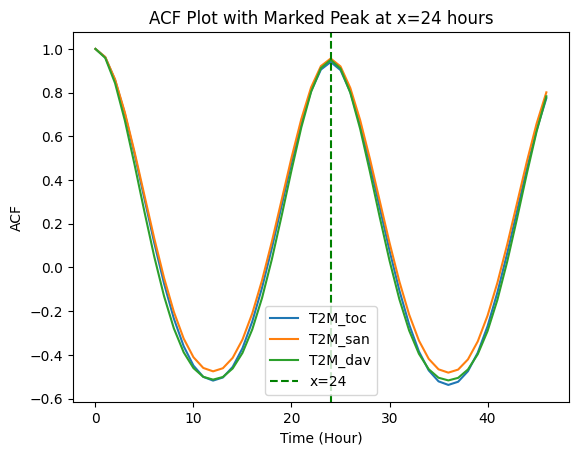

In [33]:
plt.plot(acf(df['T2M_toc']), label='T2M_toc')
plt.plot(acf(df['T2M_san']), label='T2M_san')
plt.plot(acf(df['T2M_dav']), label='T2M_dav')

plt.xlabel('Time (Hour)')
plt.ylabel('ACF')
plt.axvline(x=24, color='green', linestyle='--', label='x=24')

plt.legend()
plt.title('ACF Plot with Marked Peak at x=24 hours')

Text(0, 0.5, 'Wind Energy (GWh)')

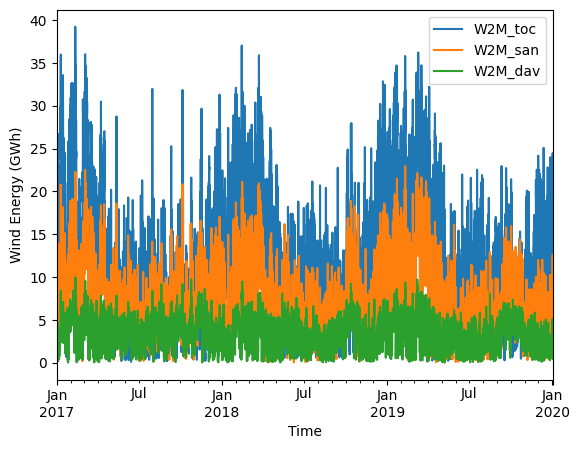

In [34]:
df[['W2M_toc', 'W2M_san', 'W2M_dav']]['2017-01-01': '2020-01-01'].plot()
plt.xlabel('Time')
plt.ylabel('Wind Energy (GWh)')

During the first few months, I noticed that wind speeds reach their peak. To track daily trends, I'm looking at a month's worth of data:

It appears that David city experiences milder winter conditions compared to the other two cities. I observed that Tocumen city has the highest wind speeds, followed by Santiago city, with David city having the lowest.

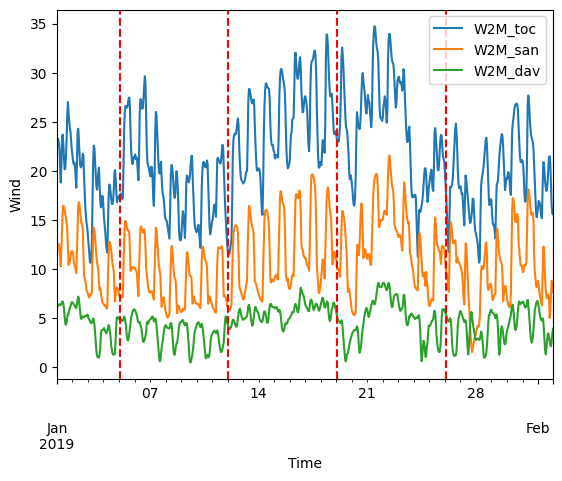

In [35]:
df[['W2M_toc', 'W2M_san', 'W2M_dav']]['2019-01-01': '2019-02-01'].plot()

#Checking weekly
plt.xlabel('Time')
plt.ylabel('Wind')
# Adding vertical lines at the start of each week
min_date, max_date = df.index.min(), df.index.max()
current_date = min_date

while current_date <= max_date:
    if current_date.weekday() == 5:  # Monday is considered the start of the week
        plt.axvline(x=current_date, color='red', linestyle='--')
    current_date += pd.Timedelta(days=1)

Text(0.5, 1.0, 'ACF Plot with Marked Peak at x=24 hours')

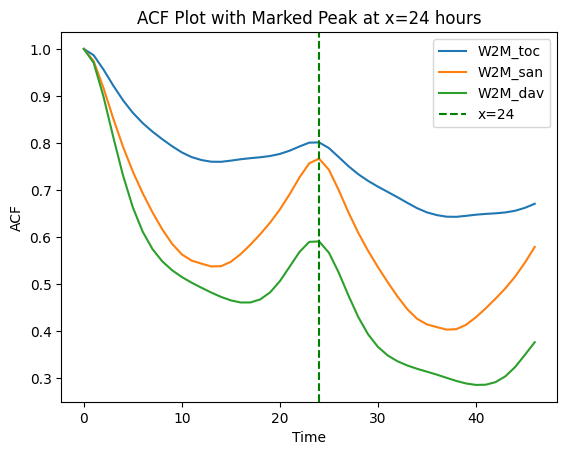

In [36]:
plt.plot(acf(df['W2M_toc']), label='W2M_toc')
plt.plot(acf(df['W2M_san']), label='W2M_san')
plt.plot(acf(df['W2M_dav']), label='W2M_dav')

plt.xlabel('Time')
plt.ylabel('ACF')
plt.axvline(x=24, color='green', linestyle='--', label='x=24')

plt.legend()
plt.title('ACF Plot with Marked Peak at x=24 hours')

## Pie chart

In [37]:

def pie_chart(start, end, df):
    mask = (df.index >= start_date) & (df.index <= end_date)
    filtered_df = df.loc[mask]

    # Aggregate the data
    aggregated_data = filtered_df.sum()
    # Convert aggregated data to absolute values
    absolute_aggregated_data = aggregated_data.abs()

    absolute_aggregated_data.drop(['nat_demand',], inplace=True)
    # Plotting the pie chart
    # absolute_aggregated_data.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Energy Distribution for the Selected Period')

    # Explode smaller slices to make them more visible and separate labels
    explode_values = [0.1 if value < 1e6 else 0 for value in absolute_aggregated_data]

    # Plotting the adjusted pie chart
    plt.figure(figsize=(12, 12))  # Increased figure size for better clarity
    absolute_aggregated_data.plot(kind='pie', autopct='%1.1f%%',
                                  title='Energy Distribution (Excluding Demand)',
                                  explode=explode_values)

# Filter data for a specific time period (update this to your desired dates)


### Pie Chart Year 2018

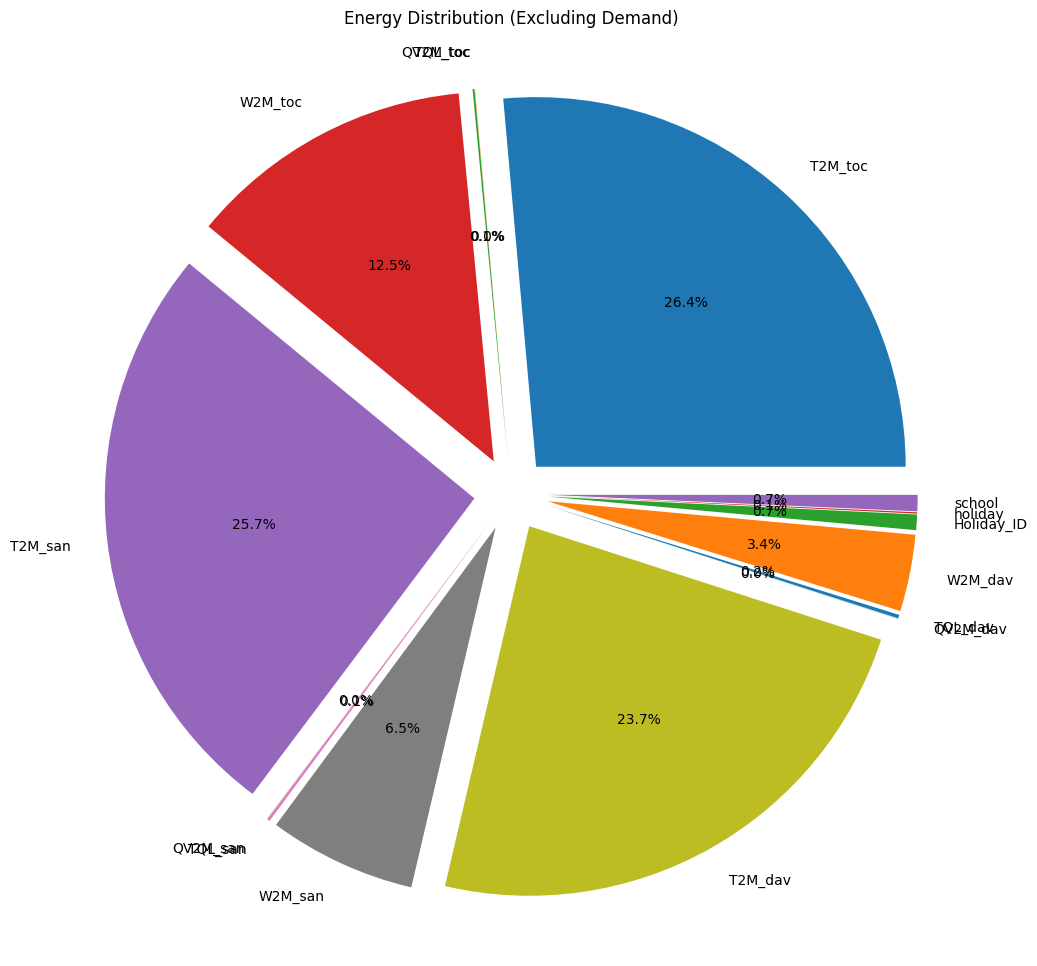

In [38]:
start_date = '2018-01-01'
end_date = '2019-01-01'
pie_chart(start_date, end_date, df)

# Pie Chart Year 2017

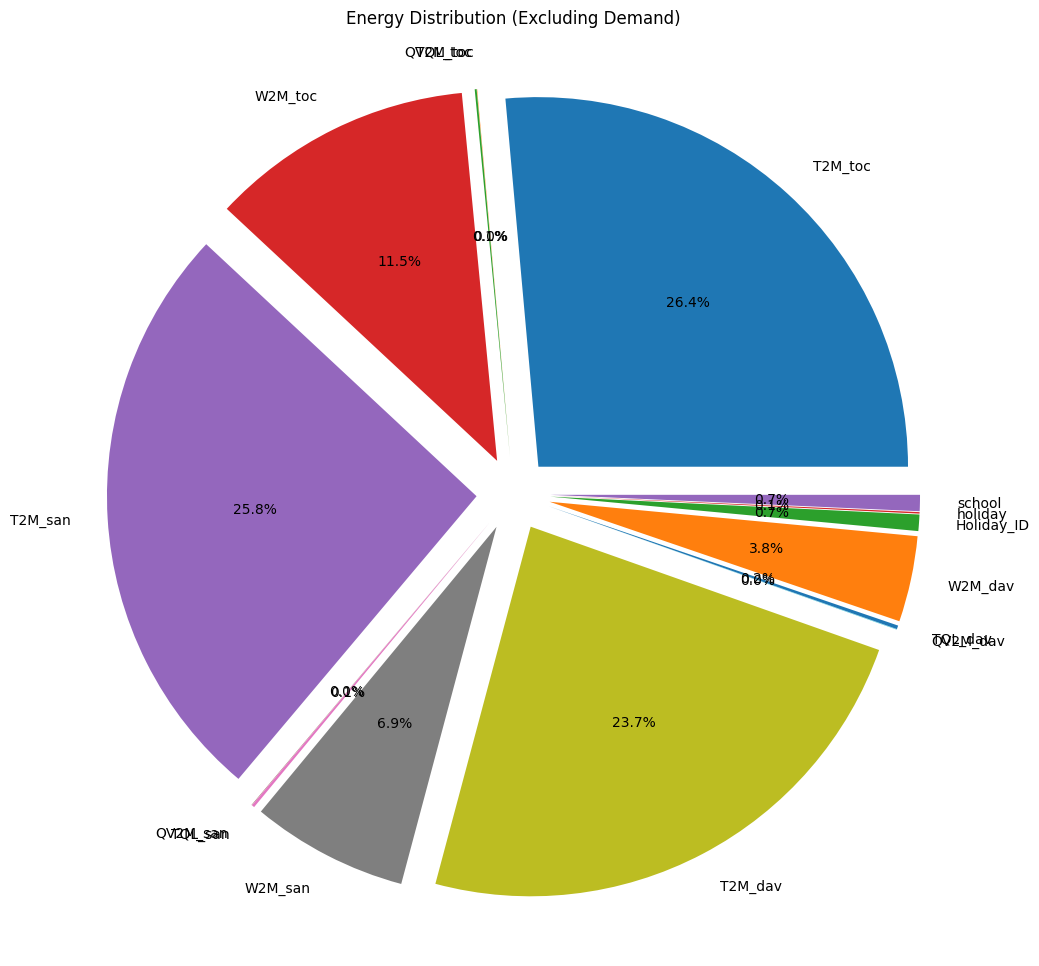

In [39]:
start_date = '2017-01-01'
end_date = '2018-01-01'
pie_chart(start_date, end_date, df)

In [40]:
def bar_chart(start_date, end_date, df):
    # Create a mask for the selected date range
    mask = (df.index >= start_date) & (df.index <= end_date)
    filtered_df = df.loc[mask]

    # Aggregate the data
    aggregated_data = filtered_df.sum()
    # Convert aggregated data to absolute values
    absolute_aggregated_data = aggregated_data.abs()
    absolute_aggregated_data.drop(['nat_demand', 'school', 'holiday'], inplace=True)

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    absolute_aggregated_data.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Energy Distribution (Excluding Demand)')
    plt.xlabel('Energy Types')
    plt.ylabel('Energy Value')
    plt.xticks(rotation=45)
    plt.show()


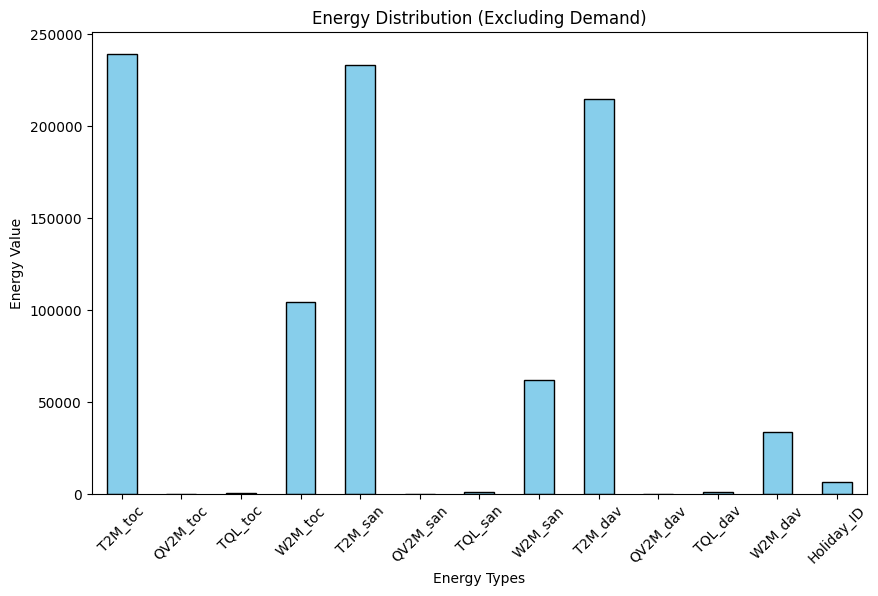

In [41]:
bar_chart(start_date, end_date, df)

In [42]:
def multi_year_bar_chart(years, df):
    plt.figure(figsize=(12, 8))  # Adjust figure size as needed

    # Adjust the width of the bars and the spacing between them
    bar_width = 0.2
    spacing = 0.05
    total_width = bar_width * len(years) + spacing * (len(years) - 1)

    # Colors for different years
    colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 'crimson', 'deepskyblue', 'gold', 'mediumorchid']


    for i, year in enumerate(years):
        # Creating a mask for each year
        start_date = f'{year}-01-01'
        end_date = f'{year}-12-31'
        mask = (df.index >= start_date) & (df.index <= end_date)
        filtered_df = df.loc[mask]

        # Aggregate and process the data
        aggregated_data = filtered_df.sum()
        absolute_aggregated_data = aggregated_data.abs()
        absolute_aggregated_data.drop(['nat_demand', 'school', 'holiday'], inplace=True)

        # Calculate the offset for each bar
        offset = (np.arange(len(absolute_aggregated_data)) * total_width) + (i * bar_width)

        # Plotting the bars for each year
        plt.bar(x=offset,
                height=absolute_aggregated_data,
                width=bar_width,
                color=colors[i % len(colors)],
                edgecolor='black',
                label=f'{year}')

    # Adjust the x-ticks to be in the center of the group of bars
    plt.xticks(ticks=np.arange(len(absolute_aggregated_data)) * total_width + bar_width,
               labels=absolute_aggregated_data.index,
               rotation=45)

    plt.title('Energy Distribution by Year')
    plt.xlabel('Energy Types')
    plt.ylabel('Energy Value(GWh)')
    plt.legend(title='Year')
    plt.show()

# Sample call to the function with the DataFrame
# Replace this with your actual DataFrame
# multi_year_bar_chart([2017, 2018, 2019], df)



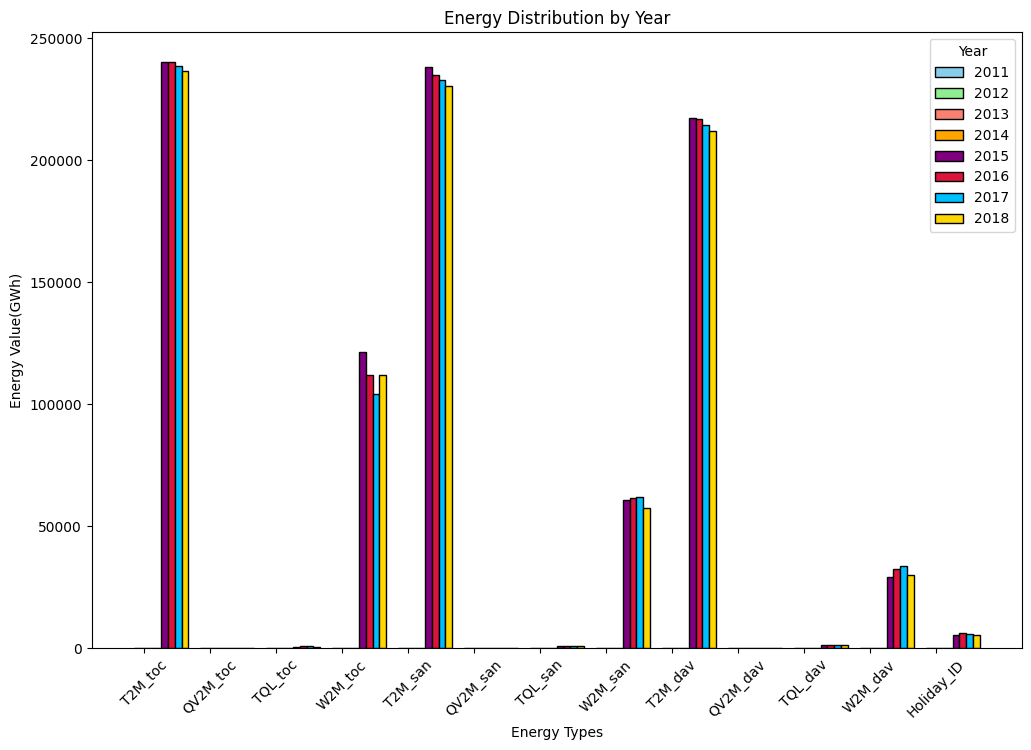

In [43]:
multi_year_bar_chart(range(2011, 2019), df)

Until 2019 temperature at 2 meters is decreasing for where in 2019, it increased in all three cities.

Wind speed fluctuated among cities and years, so a general comment is hard to tell.



# Modeling:



In [44]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [45]:
adf_test(df['nat_demand'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -20.961750
p-value                     0.000000
# lags used                57.000000
# observations          47990.000000
critical value (1%)        -3.430486
critical value (5%)        -2.861600
critical value (10%)       -2.566802
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


**Augmented Dickey-Fuller Test Results**

The Augmented Dickey-Fuller (ADF) test was conducted on the given time series data with the following outcomes:

- **ADF test statistic:** The ADF test statistic value is -20.961750.

- **p-value:** The p-value obtained from the test is 0.000000.

- **Number of lags used:** In the test, 57 lags were utilized.

- **Number of observations:** The total number of observations in the dataset is 47990.



Based on these test results, the following conclusions can be drawn:

- There is strong evidence against the null hypothesis.

- The null hypothesis is rejected.

- The data exhibits no unit root and is considered stationary.

These findings suggest that the time series data under examination is stationary and does not possess a unit root, which is a crucial characteristic for various time series analysis and modeling techniques.



### Data Splitting into Training and Testing Sets
To prepare our data for modeling and evaluation, we need to split it into training and testing sets. This allows us to train our model on one portion of the data and assess its performance on another. Below is the code to obtain information about the maximum and minimum timestamps in our dataset:

In [46]:
# Printing the maximum timestamp in the dataset
print(df.index.max())

# Printing the minimum timestamp in the dataset
print(df.index.min())


2020-06-27 00:00:00
2015-01-03 01:00:00


Selecting the following date as the dividing point between training and testing data:

In [47]:
!pip install pandas

import pandas as pd
from datetime import datetime

# Assuming 'df' is your DataFrame with a DatetimeIndex
# Convert the index of the DataFrame to be timezone-aware (if it's not already)
df.index = pd.to_datetime(df.index).tz_localize('UTC')  # Replace 'UTC' with the appropriate timezone if needed

dev_date_str = '2017-12-31'
# Convert dev_date_str to a datetime object
dev_date = datetime.strptime(dev_date_str, '%Y-%m-%d')
dev_date = pd.Timestamp(dev_date, tz='UTC')
train_data = df[:dev_date]
test_data = df[dev_date:]

## First Model: Exponential Smoothing
### Model Evaluation: Performance Assessment on Test Set

This section focuses on evaluating the model's performance by comparing its predictions against the actual values in the test set. It involves a thorough analysis of how accurately the model has forecasted, using various metrics to assess its effectiveness and reliability when applied to unseen data.

In [48]:
fitted_model = ExponentialSmoothing(train_data['nat_demand'],
                                    trend='add',
                                    seasonal='add',
                                    seasonal_periods=24).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Model Evaluation on Test Dataset



In [49]:
# Set the number of days for which the prediction is to be made
number_of_days = 120

# Calculate the total number of hours to predict based on the number of days
number_of_hours_to_predict = number_of_days * 24

# Calculate the end date for the prediction by adding the total hours to the development date (dev_date)
end_date = dev_date + timedelta(hours=number_of_hours_to_predict - 1)

# Extract the actual demand data from the test dataset for the specified period
y = test_data['nat_demand'][dev_date:end_date]

# Use the fitted model to forecast the values for the specified number of hours and rename the output series to 'HW_Forecast'
test_predictions = fitted_model.forecast(number_of_hours_to_predict).rename('HW_Forecast')


### Visual Comparison of Train, Test, and Predicted Values
The following code snippet is designed to visually compare the Gross Consumption values across the training data, test data, and the model's predictions:

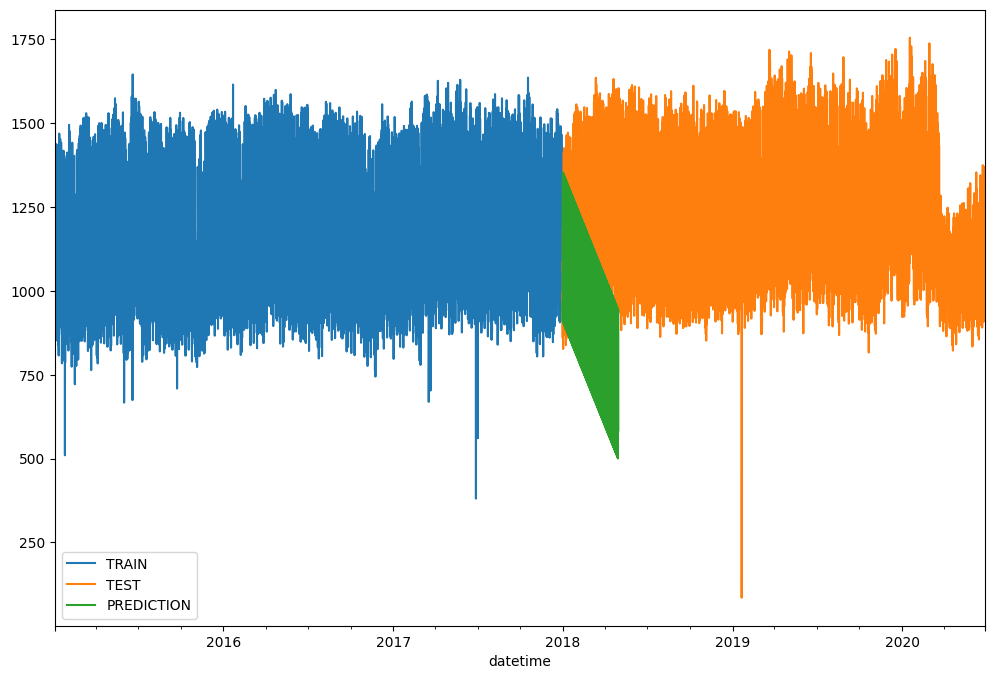

In [50]:
# Plotting the Gross Consumption from the training data
train_data['nat_demand'].plot(legend=True, label='TRAIN')

# Plotting the Gross Consumption from the test data
test_data['nat_demand'].plot(legend=True, label='TEST', figsize=(12,8))

# Plotting the predicted Gross Consumption values
test_predictions.plot(legend=True, label='PREDICTION');


To get a clearer comparison, let's zoom in on the plot:

<Axes: xlabel='datetime'>

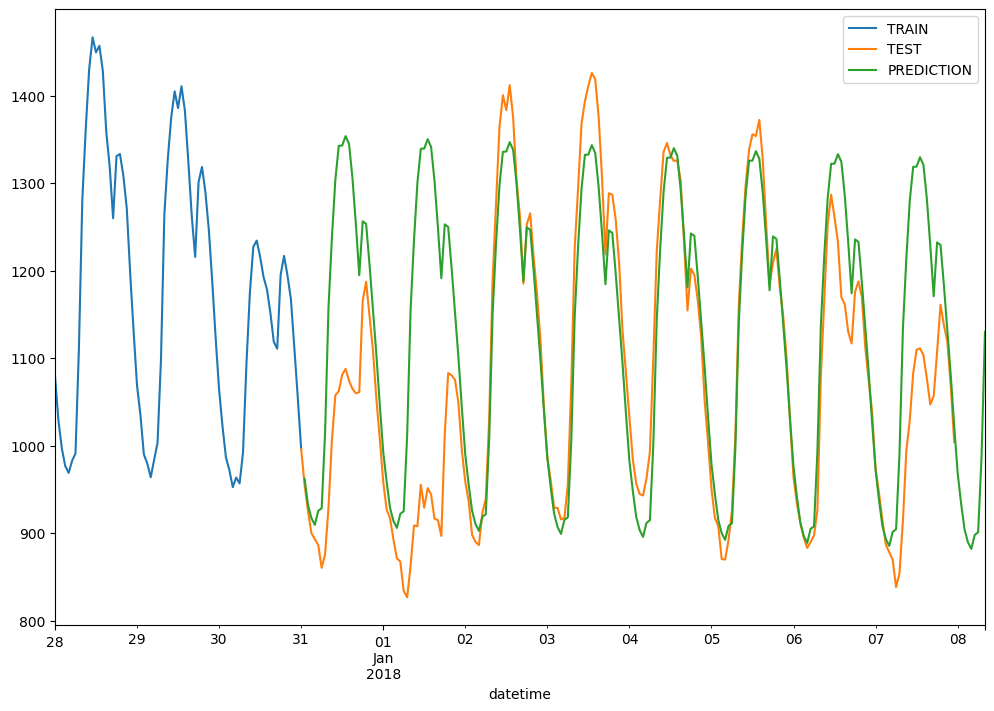

In [51]:
# Plotting the training data
train_data['nat_demand']['2017-12-28':].plot(legend=True, label='TRAIN')

# Plotting the testing data
test_data['nat_demand'][:'2018-01-07'].plot(legend=True, label='TEST', figsize=(12, 8))

# Plotting the predictions (first 200 points)
test_predictions[:200].plot(legend=True, label='PREDICTION')


The results are unsatisfactory because the predicted values show a downward trend and do not closely resemble the test dataset for longer time periods. Let's assess the results quantitatively.

### Evaluation Metrics
In this section, we will calculate and present various evaluation metrics to assess the performance of our model. We are using the scikit-learn library to compute the following metrics:

#### Mean Absolute Error (MAE):

MAE measures the average absolute difference between the actual values (y) and the predicted values (test_predictions). It provides a measure of the model's accuracy in predicting the target variable.

In [52]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, test_predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 275.1981285461904


MAE is 275.1981285461904

#### Mean Squared Error (MSE):

MSE calculates the average of the squared differences between the actual values and the predicted values. It penalizes larger errors more heavily than MAE.

In [53]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, test_predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 102430.67639839477


MSE is 102430.67639839477

#### Root Mean Squared Error (RMSE):

RMSE is the square root of MSE and provides a measure of the model's error in the same units as the target variable (y).

In [54]:
import numpy as np
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 320.04792828324133


RMSE is 320.04792828324133

These errors being significant signify that the model is performing poorly. It implies that the model's predictions are not accurately capturing the underlying patterns in the data, and there is room for improvement in the model's predictive capabilities. Further analysis and potentially model refinement may be needed to enhance its performance.

## Forecasting into the Future
### Exponential Smoothing
Although this model exhibited a notably high error, let's assess how it performs in predicting future values.

In [55]:
final_model = ExponentialSmoothing(df['nat_demand'],
                                    trend='add',
                                    seasonal='add',
                                    seasonal_periods=24).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='datetime'>

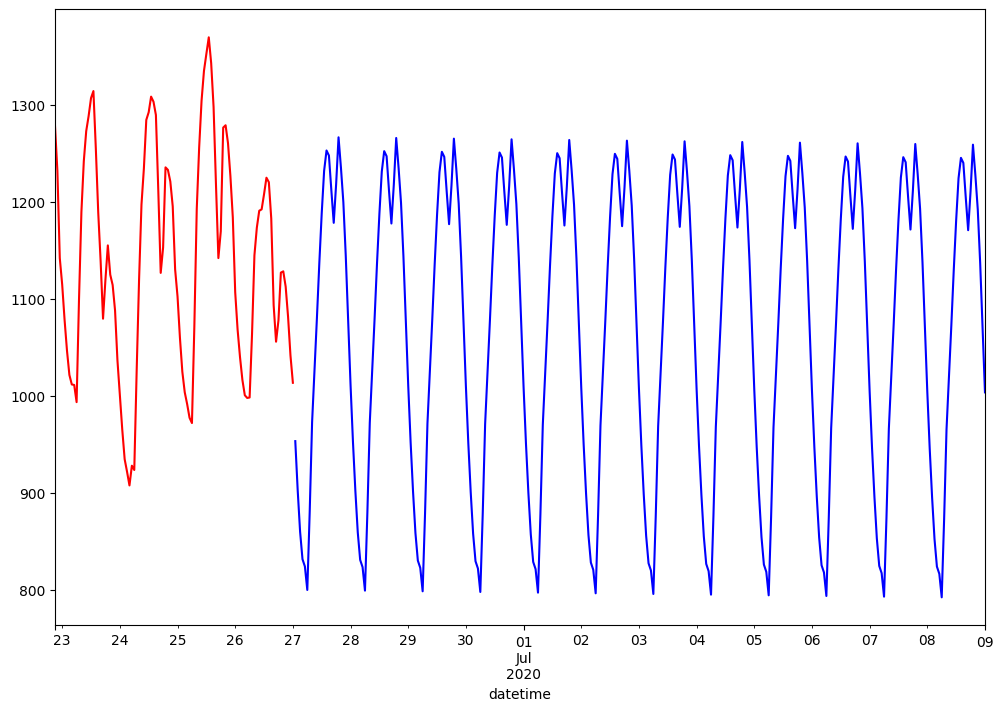

In [56]:
# Setting the number of days for the forecast
day_forecast = 12
hours_forecast = day_forecast * 24

# Generating forecast predictions
forecast_predictions = final_model.forecast(hours_forecast)

# Plotting the last 100 data points in red and the forecast in blue
df['nat_demand'][-100:].plot(figsize=(12, 8), color='red')
forecast_predictions.plot(color='blue')

As anticipated, this model performs inadequately, and the disparity between the actual data and the predicted data is readily apparent upon visual inspection.

## Autoregression (AR) Model

The Autoregression (AR) model is a fundamental time series forecasting technique that is particularly useful when dealing with data exhibiting temporal dependencies. It assumes that future values in a time series can be predicted based on their historical values.

### Key Concepts:

- **Time Dependency:** The AR model captures the idea that each data point in a time series is influenced by its previous observations.

- **Lag Order (p):** The choice of the lag order, denoted as 'p', determines how many past time steps are considered for predicting the future value.

- **Coefficients:** The model estimates coefficients for each lagged value, which govern the strength and direction of the relationship between past observations and the current one.

- **Forecasting:** Once trained, the AR model can make future predictions by applying the learned coefficients to the historical data.

- **Model Evaluation:** Performance evaluation is done using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

- **Limitations:** The AR model assumes linear relationships and may not perform well in complex, nonlinear scenarios.

To use the AR model effectively, you'll need to select an appropriate lag order 'p' and evaluate its performance on your specific time series data. Model selection techniques like AIC and BIC can help with lag order selection.


In [57]:
# Importing the Autoregression model from statsmodels library
from statsmodels.tsa.ar_model import AutoReg,ARResults

In [58]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [59]:
model = AutoReg(train_data['nat_demand'], lags=1)

In [60]:
ARfit = model.fit()

In [61]:
ARfit.params

const            58.996727
nat_demand.L1     0.949018
dtype: float64

In [62]:
# This is the general format for obtaining predictions
start=len(train_data['nat_demand'])
end=len(train_data['nat_demand'])+len(test_data['nat_demand'])-1
predictions1 = ARfit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

<Axes: xlabel='datetime'>

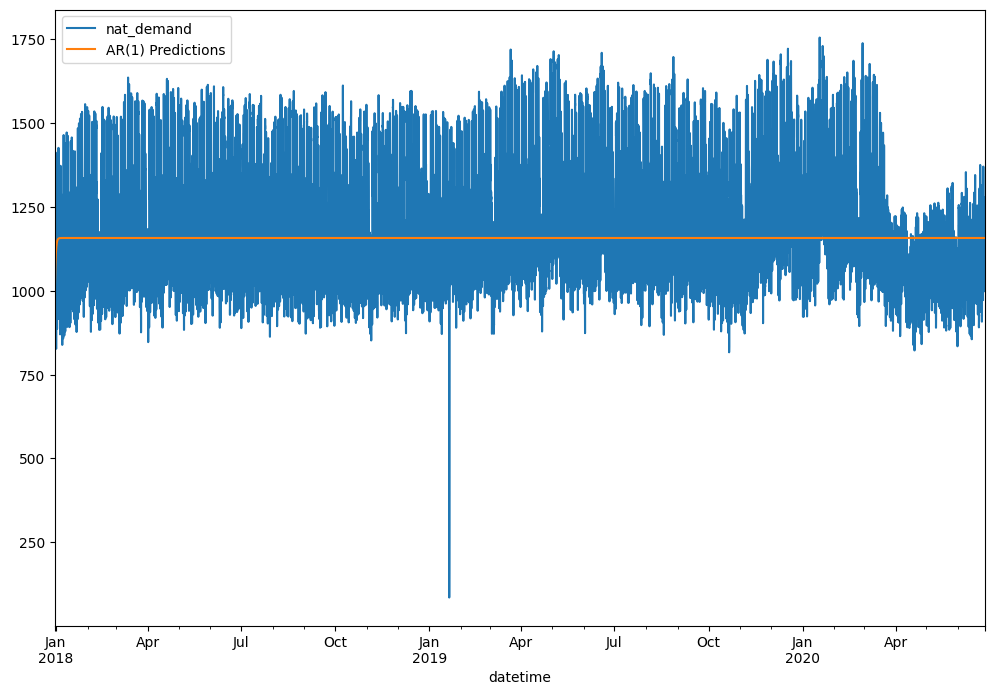

In [63]:
test_data['nat_demand'].plot(figsize=(12, 8), legend=True)
predictions1.plot(figsize=(12, 8), legend=True)

In [64]:
mae = mean_absolute_error(test_data['nat_demand'], predictions1)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 159.92319572435957


MAE has decreased

In [65]:
mse = mean_squared_error(test_data['nat_demand'], predictions1)
print("Mean Squared Error:", mse)


Mean Squared Error: 38211.641427252376


MSE has decreased

In [66]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 195.47798195002008


RMSE has also decreased

The outcome of this particular model appears to be a flat horizontal line, which indicates that it struggles to capture the fluctuations present in the target variable. Furthermore, the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) all exhibit substantial values, underscoring the model's inadequacy in accurately predicting the target variable. These results collectively suggest that the model's performance is subpar and may require further refinement or the exploration of alternative modeling techniques to better capture the underlying patterns in the data.

## Automated ARIMA Model Selection with `pmdarima`

In time series analysis and forecasting, selecting the appropriate ARIMA model parameters can be a challenging task. The `pmdarima` library provides a convenient and automated way to perform ARIMA model selection.

The code snippet below demonstrates the use of the `auto_arima` function from `pmdarima`. This function automates the process of determining the optimal ARIMA model parameters based on the provided time series data.



In [67]:
# Importing the `auto_arima` function from `pmdarima` library
!pip install pmdarima
from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.0 MB/s eta 0:00:00


# Automated ARIMA Model Selection and Summary

In time series analysis, selecting the optimal ARIMA model parameters can be a crucial step in achieving accurate forecasts. The code snippet below demonstrates the use of the `auto_arima` function to automate the process of finding the best ARIMA model for a given time series.

In [68]:
# Using auto_arima to automatically select the best ARIMA model for 'GrossCon' time series data

# Data input: 'GrossCon' time series data (first 1000 data points)
stepwise_fit = auto_arima(df['nat_demand'][:500],

                          # Starting values for ARIMA orders
                          start_p=0,  # Autoregressive order (p)
                          start_q=0,  # Moving average order (q)

                          # Maximum allowable ARIMA orders
                          max_p=3,  # Maximum autoregressive order (p)
                          max_q=3,  # Maximum moving average order (q)

                          # Seasonality information (24-hour seasonality)
                          m=24,  # Number of time steps in a seasonal cycle

                          # Enable seasonal decomposition
                          seasonal=True,

                          # Differencing order (None implies automatic differencing)
                          d=None,

                          # Display progress information during model search
                          trace=True,

                          # Behavior when an order doesn't work (ignore errors)
                          error_action='ignore',

                          # Suppress convergence warnings
                          suppress_warnings=True,

                          # Use the stepwise search approach for efficiency
                          stepwise=True)


stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=6259.356, Time=5.53 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=6621.700, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=8.05 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=5797.247, Time=8.57 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=8434.955, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=6005.168, Time=1.79 sec
 ARIMA(0,0,1)(1,0,1)[24] intercept   : AIC=5797.939, Time=15.58 sec
 ARIMA(0,0,1)(0,0,2)[24] intercept   : AIC=5675.693, Time=28.13 sec
 ARIMA(0,0,1)(1,0,2)[24] intercept   : AIC=5679.311, Time=35.37 sec
 ARIMA(0,0,0)(0,0,2)[24] intercept   : AIC=6242.280, Time=9.49 sec
 ARIMA(1,0,1)(0,0,2)[24] intercept   : AIC=4911.569, Time=18.06 sec
 ARIMA(1,0,1)(0,0,1)[24] intercept   : AIC=5009.431, Time=8.21 sec
 ARIMA(1,0,1)(1,0,2)[24] intercept   : AIC=4726.761, Time=20.57 sec
 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=4699.180, Time=8.43 sec
 ARIMA(1,0,1)(1,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  500
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 24)   Log Likelihood               -2335.539
Date:                              Tue, 06 Aug 2024   AIC                           4685.079
Time:                                      18:01:39   BIC                           4714.581
Sample:                                  01-03-2015   HQIC                          4696.655
                                       - 01-23-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.5657      1.939      3.386      0.001       2.765      10.367
ar.L1          0.8892      0.017     51.905      0.000       0.856       0.923
ma.L1          0.4751      0.038     12.659      0.000       0.402       0.549
ma.L2          0.2485      0.042      5.928      0.000       0.166       0.331
ar.S.L24       0.9441      0.012     76.680      0.000       0.920       0.968
ma.S.L24      -0.6480      0.039    -16.732      0.000      -0.724      -0.572
sigma2       599.8471     29.054     20.646      0.000     542.902     656.792
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):                95.68
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA(1,0,2)(1,0,1)[24]  is the best model.

In [69]:
# Import the necessary library
import statsmodels.api as sm

# Create the ARIMA model with the selected parameters
model = sm.tsa.ARIMA(train_data['nat_demand'], order=(1, 0, 2), seasonal_order=(1, 0, 2, 24), enforce_stationarity=False)

# Fit the ARIMA model to the data
model_fit = model.fit()




In [83]:
your_desired_number_of_steps = 24 * 30

# Make future predictions
forecasted_values = model_fit.forecast(steps=your_desired_number_of_steps)

<Axes: xlabel='datetime'>

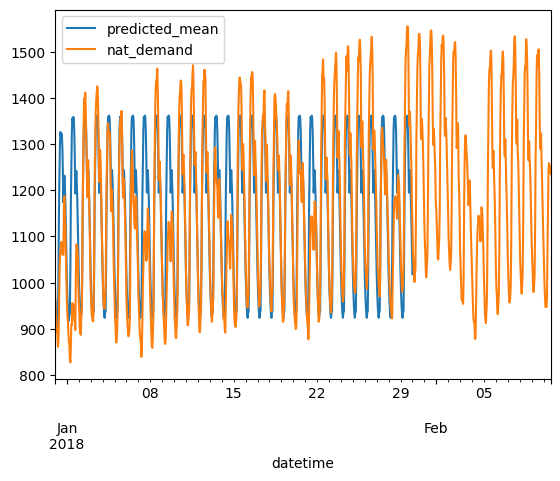

In [84]:
forecasted_values.plot(legend=True)
test_data['nat_demand'][:1000].plot(legend=True)

In [85]:
mae = mean_absolute_error(test_data['nat_demand'][:your_desired_number_of_steps], forecasted_values)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 85.04686660994068


MAE keeps decreasing

In [86]:
mse = mean_squared_error(test_data['nat_demand'][:your_desired_number_of_steps], forecasted_values)
print("Mean Squared Error:", mse)

Mean Squared Error: 13756.872142604143


MSE keeps decreasing

In [87]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 117.28969324968048


RMSE keep decreasing

The results suggest that this model exhibits a high level of error, indicating its inadequacy as an effective predictive model.

## Seasonal Autoregressive Integrated Moving Average (SARIMA) Model

The Seasonal Autoregressive Integrated Moving Average, abbreviated as SARIMA, is an advanced time series forecasting model that extends the capabilities of the ARIMA (Autoregressive Integrated Moving Average) model. SARIMA is specifically designed to handle time series data with recurring seasonal patterns.

### Key Characteristics:

- **Autoregressive (AR) Component:** SARIMA includes an autoregressive component, similar to ARIMA, to capture the relationship between the current value and its past values.

- **Differencing (I):** Like ARIMA, SARIMA may require differencing to make the time series stationary by removing trends and seasonality.

- **Moving Average (MA) Component:** SARIMA incorporates a moving average component to account for the influence of past errors or residuals on the current value.

- **Seasonal Component (S):** What distinguishes SARIMA is its inclusion of seasonal components. These components capture patterns that repeat at regular intervals, making SARIMA suitable for data with strong seasonal trends.

- **Seasonal Differencing (D):** SARIMA allows for seasonal differencing to address seasonal patterns within the data.

- **Model Selection:** Selecting the appropriate SARIMA model involves determining the orders for the AR, I, MA, and seasonal components. This process often requires data analysis and may involve techniques like ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots.

- **Forecasting:** Once trained, the SARIMA model can provide future predictions, including point forecasts and prediction intervals.

SARIMA models are valuable tools for handling time series data with complex seasonality, offering accurate forecasts for applications such as sales forecasting, demand prediction, and financial time series analysis. However, effective utilization of SARIMA requires a strong grasp of time series concepts and careful model selection.


### Using the seasonal decomposed data as exogenic parameter in SARIMA.

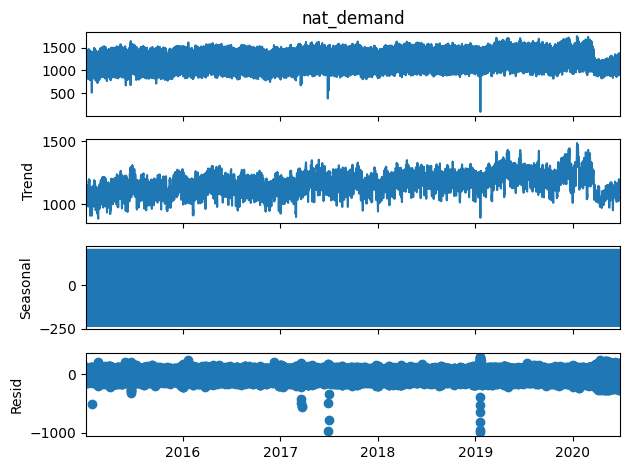

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['nat_demand'], model='additive')  # model='add' also works
result.plot();

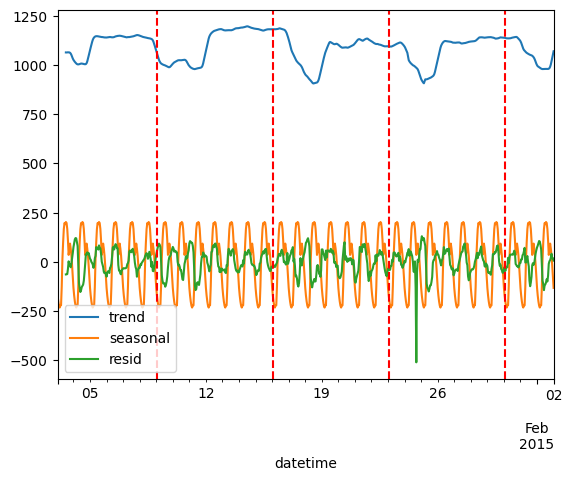

In [90]:
n_days = 30
n = 24 * n_days
# To plot the first n points of the trend component
result.trend[:n].plot(legend=True);

# To plot the first n points of the seasonal component
result.seasonal[:n].plot(legend=True);

# To plot the first n points of the residual component
result.resid[:n].plot(legend=True);

# Adding vertical lines at the start of each week
min_date, max_date = df.index.min(), df.index.max()
current_date = min_date

while current_date <= max_date:
    if current_date.weekday() == 4:  # Monday is considered the start of the week
        plt.axvline(x=current_date, color='red', linestyle='--')
    current_date += pd.Timedelta(days=1)

<Axes: xlabel='datetime'>

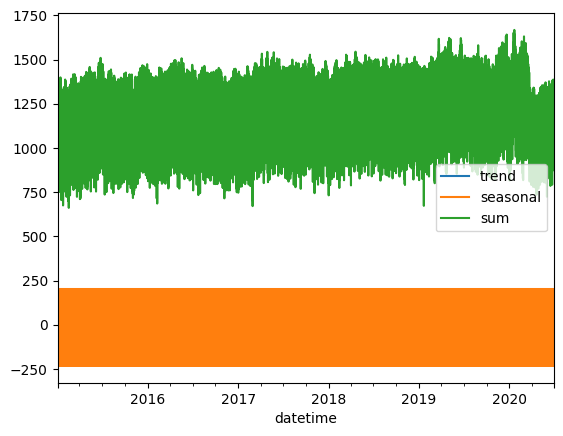

In [91]:
decomp_data = {}
decomp_data['trend'] = result.trend
decomp_data['seasonal'] = result.seasonal
df_decom_data = pd.DataFrame(decomp_data)
df_decom_data['sum'] = df_decom_data['trend'] + df_decom_data['seasonal']
df_decom_data.plot()

In [92]:
df_decom_data.head()

,trend,seasonal,sum
datetime,,,
2015-01-03 01:00:00+00:00,NaN,-171.887459,NaN
2015-01-03 02:00:00+00:00,NaN,-201.678198,NaN
2015-01-03 03:00:00+00:00,NaN,-223.106475,NaN
2015-01-03 04:00:00+00:00,NaN,-232.980741,NaN
2015-01-03 05:00:00+00:00,NaN,-220.058009,NaN


Creating train and test data sets:

In [97]:
dev_date_str = '2017-12-31'
# Convert dev_date_str to a datetime object
dev_date = datetime.strptime(dev_date_str, '%Y-%m-%d')
dev_date = pd.Timestamp(dev_date, tz='UTC')
train_data_exo = df[:dev_date]
test_data_exo = df[dev_date:]

df_decom_data_train = df_decom_data[:dev_date]

<Axes: xlabel='datetime'>

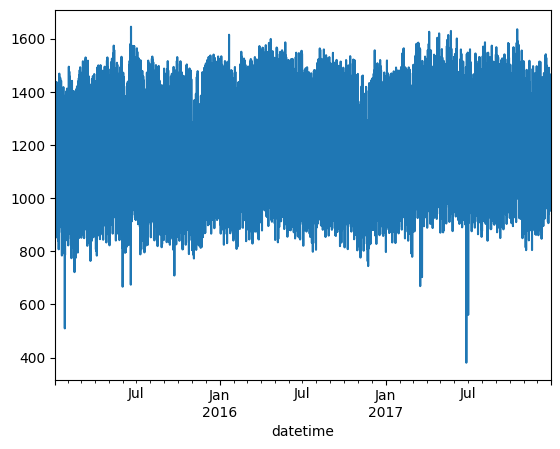

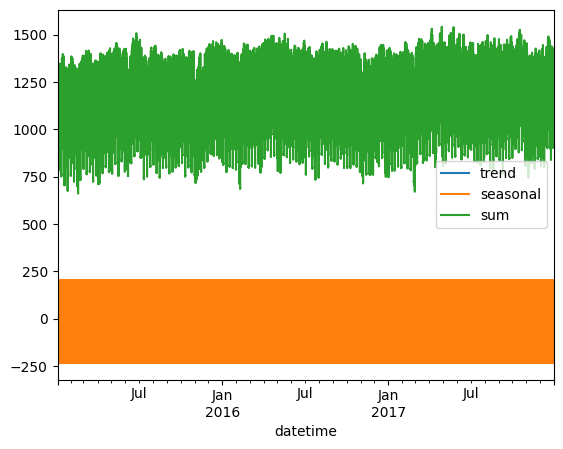

In [98]:
ind = 100000

train_data_exo['nat_demand'][:ind].plot()
df_decom_data_train[:ind].plot()

Fitting the model to the train data set:

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

index = - 200

model = SARIMAX(train_data_exo['nat_demand'][index:],
                exog=df_decom_data_train[index:],
                order=(1, 0, 2),
                seasonal_order=(1, 0, 2, 24),
                enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         nat_demand   No. Observations:                  200
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 24)   Log Likelihood                -894.236
Date:                            Tue, 06 Aug 2024   AIC                           1808.473
Time:                                    18:17:16   BIC                           1841.456
Sample:                                12-22-2017   HQIC                          1821.821
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.3765      0.028     13.656      0.000       0.322       0.431
seasonal       0.2500      0.039      6.474      0.000       0.174       0.326
sum            0.6266      0.015     41.690      0.000       0.597       0.656
ar.L1          0.8256      0.049     16.705      0.000       0.729       0.923
ma.L1          0.3281      0.067      4.918      0.000       0.197       0.459
ma.L2          0.2731      0.066      4.112      0.000       0.143       0.403
ar.S.L24       0.1600      0.509      0.315      0.753      -0.837       1.157
ma.S.L24       0.2618      0.510      0.513      0.608      -0.738       1.262
ma.S.L48       0.1048      0.217      0.483      0.629      -0.320       0.530
sigma2       433.0002     33.854     12.790      0.000     366.647     499.353
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                23.38
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -0.00
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.2e+17. Standard errors may be unstable.
"""

Preparing the exog_forcast data for prediction purposes:

In [112]:
# Debug: Check the shape of exog_forecast
print(f"Shape of exog_forecast: {exog_forecast.shape}")
print(f"Expected shape: ({n_hours_to_predict}, {df_decom_data_train.shape[1]})")

# Ensure the length of exog_forecast matches n_hours_to_predict
if exog_forecast.shape[0] != n_hours_to_predict:
    print(f"Warning: Length of exog_forecast does not match the number of periods to forecast.")
else:
    print("Shape of exog_forecast is correct.")

# Adjust exog_forecast if necessary
if exog_forecast.shape[0] != n_hours_to_predict:
    exog_forecast = exog_forecast.head(n_hours_to_predict)

Shape of exog_forecast: (1429, 3)
Expected shape: (21817, 3)


There is no match, so first need to match them

In [113]:
# Recalculate the forecast period to match the available exogenous data
forecast_period_length = exog_forecast.shape[0]

# Adjust the end_hour based on the length of exog_forecast
new_end_hour = start_hour + pd.Timedelta(hours=forecast_period_length)

# Adjust the forecast period delta
delt = new_end_hour - start_hour

# Extract the exogenous forecast data
start_hour_exo_test = start_hour - pd.DateOffset(years=n_years_back)
exog_forecast = df_decom_data_train[start_hour_exo_test: start_hour_exo_test + delt]

# Ensure that the length matches
print(f"Adjusted shape of exog_forecast: {exog_forecast.shape}")

Adjusted shape of exog_forecast: (1430, 3)


In [114]:
start_hour = train_data.index.max()
n_hours_to_predict = test_data.shape[0]

end_hour = start_hour + pd.Timedelta(hours=n_hours_to_predict)

delt = end_hour - start_hour

# to find the exog_forecast data we go back n years in data and pick the history
n_years_back = 3
start_hour_exo_test = start_hour - pd.DateOffset(years=n_years_back)
exog_forecast = df_decom_data_train[start_hour_exo_test: start_hour_exo_test + delt][:-1]

predictions = results.predict(start=start_hour,
                              end=end_hour,
                              exog=exog_forecast).rename('SARIMAX(1, 0, 1)(1, 0, 1, 24) Predictions')

ValueError: Provided exogenous values are not of the appropriate shape. Required (21817, 3), got (21744, 3).

Couldnot fix the matching, so I had to skip SARIMA

NameError: name 'predictions' is not defined

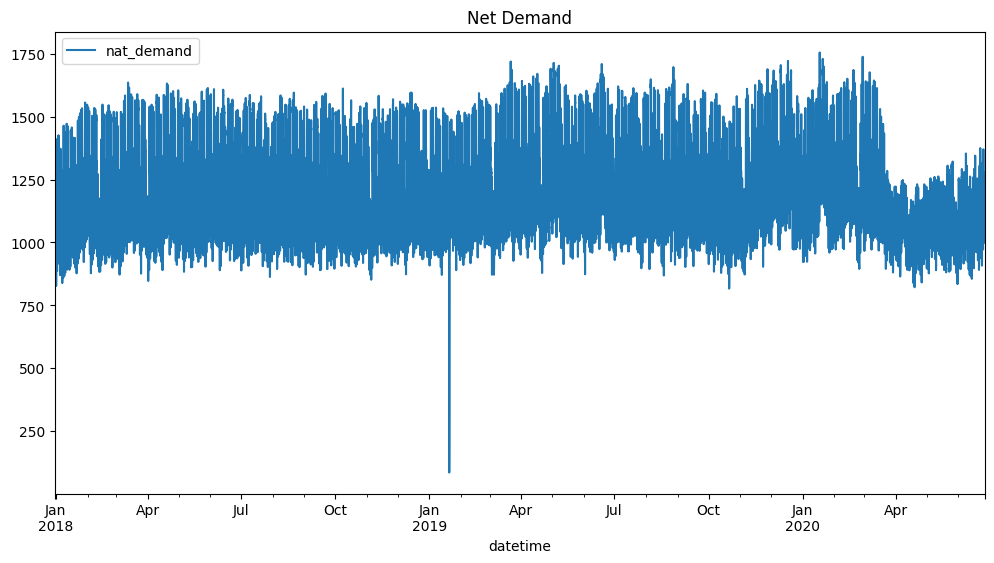

In [101]:
title = 'Net Demand'
ylabel=''
xlabel=''

ax = test_data['nat_demand'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [102]:
import pandas as pd

# Define train_data_exo, for example:
train_data_exo = pd.DataFrame({'nat_demand': [100, 120, 130, 115]})

# Define test_data_exo. For example:
test_data_exo = pd.DataFrame({'nat_demand': [105, 118, 125]}) # Define test_data_exo

# Define the index for slicing. For example, to select all elements:
index = 0

# Predicting on the test data set:
start = len(train_data_exo['nat_demand'][index:])  # Now 'index' is defined
end = len(train_data_exo['nat_demand'][index:]) + len(test_data_exo['nat_demand']) - 1

# Fit your SARIMAX model to the training data here and assign it to 'results'
# For example:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# results = SARIMAX(train_data_exo['nat_demand'], order=(1, 0, 2), seasonal_order=(1, 0, 2, 24)).fit()

# Assuming 'results', 'exog_forecast' are defined somewhere earlier in the code
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1, 0, 2)(1, 0, 2, 24) Predictions')

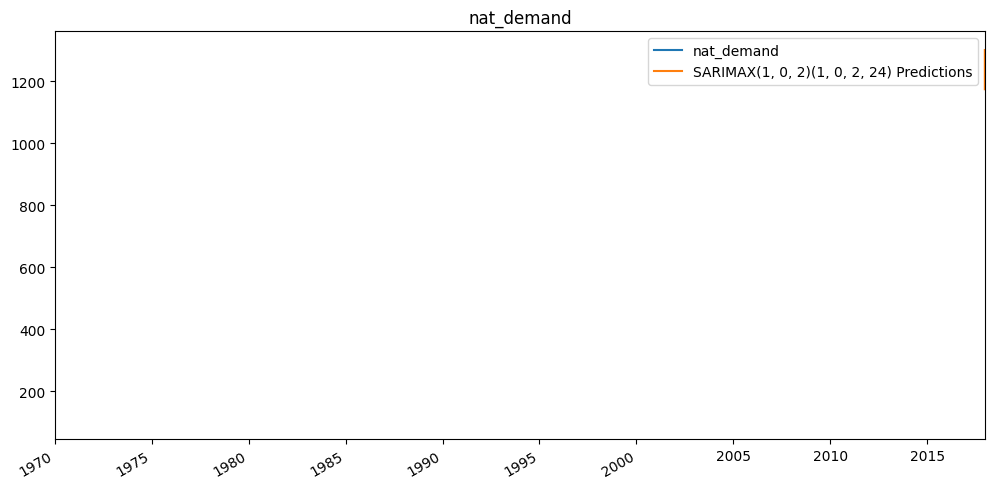

In [104]:
# Plot predictions against known values
title = 'nat_demand'
ylabel=''
xlabel=''

ax = test_data_exo['nat_demand'][:100000].plot(legend=True,figsize=(12,6),title=title)
predictions[:100000].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

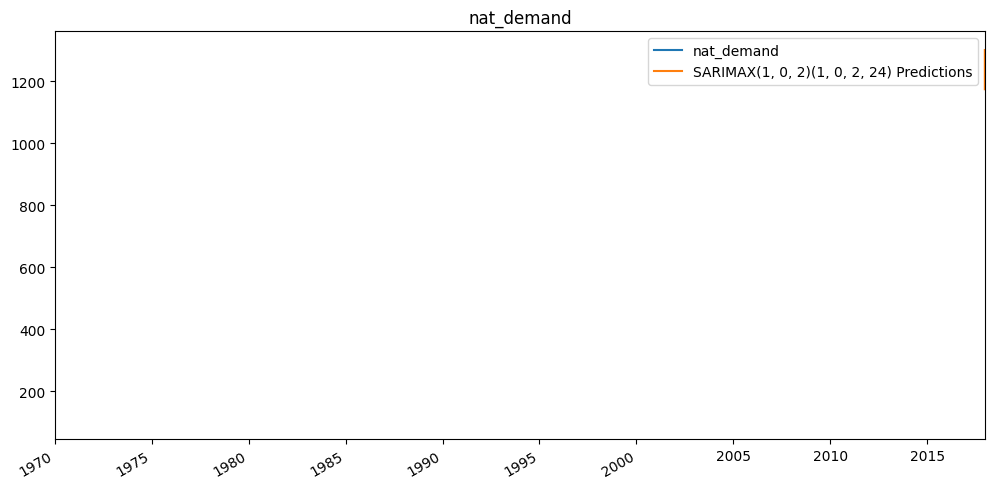

In [105]:
ax = test_data_exo['nat_demand'][:500].plot(legend=True,figsize=(12,6),title=title)

predictions[:500].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [106]:
mae = mean_absolute_error(test_data_exo['nat_demand'], predictions[:-1])
print("Mean Absolute Error:", mae)

ValueError: Found input variables with inconsistent numbers of samples: [3, 2]

In [ ]:
mse = mean_squared_error(test_data_exo['GrossCon'], predictions[:-1])
print("Mean Squared Error:", mse)

In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
df.shape

### Apply on the above method on all of the data:

In [ ]:

ind_start = 12 + 50000
ind_end = - 12

model = SARIMAX(df['GrossCon'][ind_start:ind_end],
                exog=df_decom_data[ind_start:ind_end],
                order=(1, 0, 2),
                seasonal_order=(1, 0, 2, 24),
                enforce_invertibility=False)
results = model.fit()
results.summary()

### Predicting the future:

In [109]:
start_hour = df.index.max()

# Define the prediction horizon
n_years_to_predict = 0
n_months_to_predict = 1
n_day_to_predict = 29
end_hour = start_hour + pd.DateOffset(years=n_years_to_predict, months=n_months_to_predict, days=n_day_to_predict)

print(start_hour, end_hour)
delt = end_hour - start_hour

print(delt)

print(len(pd.date_range(start_hour, end_hour, freq="H")))
# to find the exog_forecast data we go back n years in data and pick the history
n_years_go_back = 1
start_hour_exo = start_hour - pd.DateOffset(years=n_years_go_back, months=0, days=0, hours=0)
exog_forecast = df_decom_data[start_hour_exo: start_hour_exo + delt + pd.DateOffset(years=0, months=0, days=0, hours=11)]

print(start_hour_exo, start_hour_exo + delt, exog_forecast.shape)
predictions = results.predict(start=start_hour,
                              end=end_hour,
                              exog=exog_forecast).rename('SARIMAX(1, 0, 2)(1, 0, 2, 24) Predictions')

2020-06-27 00:00:00+00:00 2020-08-25 00:00:00+00:00
59 days 00:00:00
1417
2019-06-27 00:00:00+00:00 2019-08-25 00:00:00+00:00 (1428, 3)


ValueError: Provided exogenous values are not of the appropriate shape. Required (23232, 3), got (1428, 3).

In [108]:
# Plot predictions against known values
title = 'net_demand'
ylabel=''
xlabel=''

ax = test_data_exo['net_demand'][-1000:].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

KeyError: 'net_demand'